## SME: BJ goods and competitive banks 
Given policy $\tau$, we get real money balance $(z)$ and market interest rate $(i=i_{l}=i_{d})$ by solving

\begin{equation}
\begin{split}
z^{\star} \leftarrow  \frac{1+\tau -\beta}{\beta} &= R(z,i)
\\
i_{l}=i_{d}=i^{\star} \leftarrow \alpha_{0} z &= \int^{\tilde{\rho}}_{\underline{\rho}} [\alpha_{1}+2\alpha_{2}(1-J(\rho))] \xi(i,\rho,z) \text{d}J(\rho)
\end{split}
\label{eq:k-phi-high-type-case1}
\end{equation}

where
\begin{equation*}
\begin{split}
R(z,i) &:= \alpha_{0}i_{d} + \int^{\tilde{\rho}}_{\underline{\rho}} i [\alpha_{1}+2\alpha_{2}(1-J(\rho))] \text{d}J(\rho)
\\
&+ \int^{\hat{\rho}}_{\tilde{\rho}} [\alpha_{1}+2\alpha_{2}(1-J(\rho))] \bigg[\frac{1}{\rho}\bigg(\frac{z}{\rho}\bigg)^{-\sigma} -1 \bigg] \text{d}J(\rho)
\end{split}
\end{equation*}

* Two equations and two unknowns 

In [1]:
import bcw_bj as main
import hlmw as hlmw
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import interpolate
from scipy.optimize import brentq, fsolve
import tikzplotlib
import time

In [2]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

In [3]:
font = {'family' : 'serif','weight':'normal',
        'size'   : 10}
plt.rc('font', **font)

### Calibrated parameters
* $(\sigma_{DM}, \bar{U}_{CM}) = (0.28, 1.9)$
* $\lambda = 0.62$
    * $\alpha_{0} = (1-\lambda)^2$
    * $\alpha_{1} = 2(1-\lambda)\lambda$
    * $\alpha_{2} = \lambda^{2}$
    
        

In [4]:
model = main.baseline_mod(σ_DM=0.28, λ=0.62, Ubar_CM=1.9)

### Example 0

* Solve system of two equations, given $\tau=0$

In [5]:
z_guess = 0.5
i_guess = 0.01
τ = 0.0

tic = time.time()
z, i = model.solve_z_i(z_guess, i_guess, τ) 
toc = time.time() - tic
print(z, i, toc)

0.6210297873653836 0.021692270987596428 8.33828330039978


### Example 0: few more check

In [6]:
### Check market clearing
Excess_loan_demand = model.Total_loan_func(i, z, τ) - model.α_0*z
Excess_loan_demand

-3.1688289395259694e-08

In [7]:
### Check i_star vs. i_policy
print(i - model.i_policy(τ) )

0.0017004309223169964


In [8]:
### Check where different initial guesses will give the same answer

z_guess1 = 0.6
i_guess1 = 0.0185
τ = 0.0

tic = time.time()
z, i = model.solve_z_i(z_guess1, i_guess1, τ) # system of two equations given zero inflation
toc = time.time() - tic
print(z, i, toc)

0.6210297283318174 0.021692264956258474 8.115511178970337


* Different initial guess still give the same answer
* Loan market clears
* Equilibrium (market) loan rate is higher than the BCW case ($i=(1+\tau-\beta)/\beta)$

### Example 0: continues

* Solve system of two equations, given $\tau=0.05$

In [9]:
τ_1 = 0.05

tic = time.time()
z_1, i_1 = model.solve_z_i(z_guess, i_guess, τ_1) 
toc = time.time() - tic
print(z_1, i_1, toc)

0.4813398989817752 0.07672894868406634 8.791324853897095


In [10]:

### Check market clearing
Excess_loan_demand = model.Total_loan_func(i_1, z_1, τ_1) - model.α_0*z_1
Excess_loan_demand

2.6041492420803003e-08

In [11]:
ρ_grid = np.linspace(model.ρ_min_func(z, i, τ), model.ρ_max_func(z), 1000)
ρ_grid1 = np.linspace(model.ρ_min_func(z_1, i_1, τ_1), model.ρ_max_func(z_1), 1000)

In [12]:
ξ = [model.ξ_demand_func(ρ, i, z) for ρ in ρ_grid]
ξ1 = [model.ξ_demand_func(ρ, i_1, z_1) for ρ in ρ_grid1]

In [13]:
ρq = [model.q_expenditure(ρ, i, z) for ρ in ρ_grid]
ρq1 = [model.q_expenditure(ρ, i_1, z_1) for ρ in ρ_grid1]

In [14]:
F = [model.F_func(ρ, i, z) for ρ in ρ_grid]
F1 = [model.F_func(ρ, i_1, z_1) for ρ in ρ_grid1]

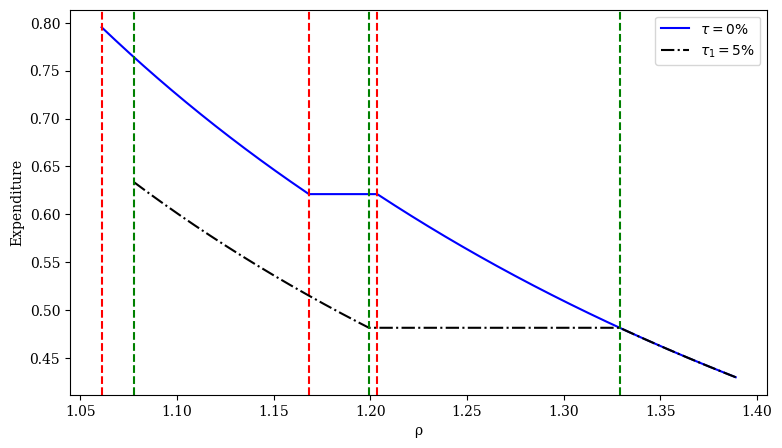

In [15]:
#plt.style.use(style='default')
plt.figure(facecolor='white', figsize=(9,5))
plt.plot(ρ_grid, ρq, color='blue', label=r"$\tau=0\%$")
plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='red')
plt.axvline(model.ρ_tilde_func(z, i), linestyle='--', color='red')
#plt.text(1.12, 0.6, r"$\tilde{\rho}_{i}(\tau)$",color='red')
plt.axvline(model.ρ_hat_func(z), linestyle='--', color='red')
#plt.text(1.185, 0.6, r"$\hat{\rho}(\tau)$",color='red')
### inflation at 5%
plt.plot(ρ_grid1, ρq1, '-.', color='black', label=r"$\tau_{1}=5\%$")
plt.axvline(model.ρ_min_func(z_1, i_1, τ_1), linestyle='--', color='green')
plt.axvline(model.ρ_tilde_func(z_1, i_1), linestyle='--', color='green')
#plt.text(1.15, 0.45, r"$\tilde{\rho}_{i}(\tau_{1})$",color='green')
plt.axvline(model.ρ_hat_func(z_1), linestyle='--', color='green')
#plt.text(1.31, 0.45, r"$\hat{\rho}(\tau_{1})$",color='green')
plt.ylabel('Expenditure')
plt.xlabel('ρ')
plt.legend()
plt.savefig("dm_expenditure.png", bbox_inches='tight', pad_inches=0.05)
plt.show()


#tikzplotlib.save("dm_expenditure.tex")
#tikzplotlib.save("dm_expenditure.pgf")


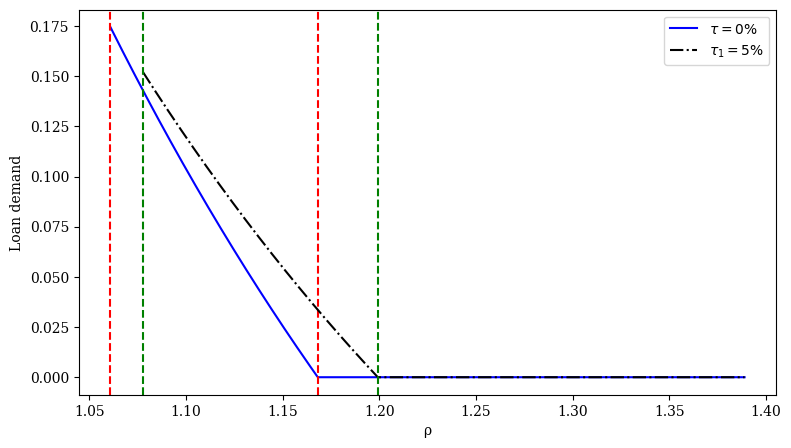

In [16]:
#plt.style.use(style='default')
plt.figure(facecolor='white', figsize=(9,5))
plt.plot(ρ_grid, ξ, color='blue', label=r"$\tau=0\%$")
plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='red')
plt.axvline(model.ρ_tilde_func(z, i), linestyle='--', color='red')
#plt.text(1.125, 0.08, r"$\tilde{\rho}_{i}(\tau)$",color='red')
plt.plot(ρ_grid1, ξ1, '-.', color='black', label=r"$\tau_{1}=5\%$")
plt.axvline(model.ρ_min_func(z_1, i_1, τ_1), linestyle='--', color='green')
plt.axvline(model.ρ_tilde_func(z_1, i_1), linestyle='--', color='green')
#plt.text(1.18, 0.1, r"$\tilde{\rho}_{i}(\tau_{1})$",color='green')
plt.ylabel('Loan demand')
plt.xlabel('ρ')
plt.legend()
plt.savefig("dm_loan.png", bbox_inches='tight', pad_inches=0.05)
plt.show()


#tikzplotlib.save("dm_loan.tex")
#tikzplotlib.save("dm_loan.pgf")

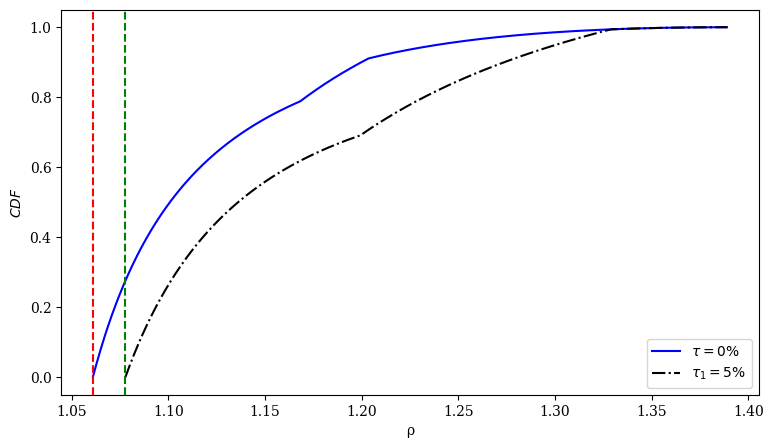

In [17]:
#plt.style.use(style='default')
plt.figure(facecolor='white', figsize=(9,5))
plt.plot(ρ_grid, F, color='blue', label=r"$\tau=0\%$")
plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='red')
plt.plot(ρ_grid1, F1, '-.', color='black', label=r"$\tau_{1}=5\%$")
plt.axvline(model.ρ_min_func(z_1, i_1, τ_1), linestyle='--', color='green')
plt.ylabel("$CDF$")
plt.xlabel("ρ")
plt.legend()
plt.savefig("cdf.png", bbox_inches='tight', pad_inches=0.05)
plt.show()


#tikzplotlib.save("cdf.tex")
#tikzplotlib.save("cdf.pgf")

### Example 1: Baseline vs. HLMW given $\tau = 0$


In [18]:
# Recall: baseline z and i, given τ = 0.0
z,i

(0.6210297283318174, 0.021692264956258474)

In [19]:
model_hlmw =hlmw.hlmw_mod(σ_DM=0.28, λ=0.62, Ubar_CM=1.9)
z_hlmw = model_hlmw.z_solver(τ)
z_hlmw

0.7272152512411513

In [20]:
ρ_grid_hlmw = np.linspace(model_hlmw.ρ_min_func(z_hlmw, τ), model_hlmw.ρ_max_func(z_hlmw), 1000)

ρq_hlmw = [model_hlmw.q_expenditure(ρ, z_hlmw) for ρ in ρ_grid_hlmw]
F_hlmw = [model_hlmw.F_func(ρ, z_hlmw) for ρ in ρ_grid_hlmw]


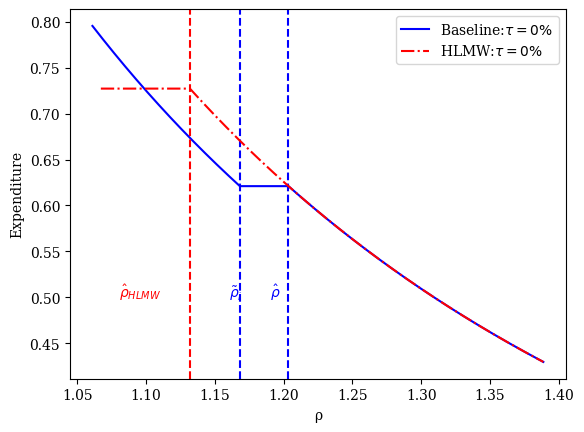

In [21]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(ρ_grid, ρq, color='blue', label="Baseline:" r"$\tau=0\%$")
#plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='blue')
plt.axvline(model.ρ_tilde_func(z, i), linestyle='--', color='blue')
plt.text(1.16, 0.5, r"$\tilde{\rho}_{i}$",color='blue')
plt.axvline(model.ρ_hat_func(z), linestyle='--', color='blue')
plt.text(1.19, 0.5, r"$\hat{\rho}$", color='blue')
plt.plot(ρ_grid_hlmw, ρq_hlmw, '-.', color='red', label="HLMW:" r"$\tau=0\%$")
#plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='orange')
plt.axvline(model_hlmw.ρ_hat_func(z_hlmw), linestyle='--', color='red')
plt.text(1.08, 0.5, r"$\hat{\rho}_{HLMW}$", color='red')
plt.ylabel('Expenditure')
plt.xlabel('ρ')
plt.legend()
plt.savefig("klln_hlmw_expenditure.png", bbox_inches='tight', pad_inches=0.05)
plt.show()


#tikzplotlib.save("klln_hlmw_expenditure.tex")
#tikzplotlib.save("klln_hlmw_expenditure.pgf")


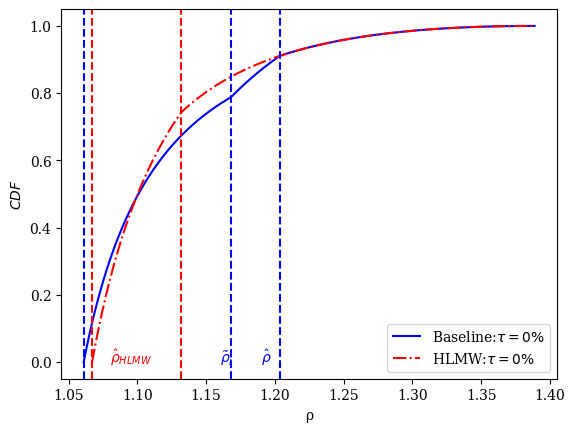

In [22]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(ρ_grid, F, color='blue', label="Baseline:" r"$\tau=0\%$")
plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='blue')
plt.plot(ρ_grid_hlmw, F_hlmw, '-.', color='red', label="HLMW:" r"$\tau=0\%$")
plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='red')

plt.axvline(model.ρ_tilde_func(z, i), linestyle='--', color='blue')
plt.text(1.16, 0.0, r"$\tilde{\rho}_{i}$",color='blue')
plt.axvline(model.ρ_hat_func(z), linestyle='--', color='blue')
plt.text(1.19, 0.0, r"$\hat{\rho}$", color='blue')

#plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='orange')
plt.axvline(model_hlmw.ρ_hat_func(z_hlmw), linestyle='--', color='red')
plt.text(1.08, 0.0, r"$\hat{\rho}_{HLMW}$", color='red')

plt.ylabel(r"$CDF$")
plt.xlabel("ρ")
plt.legend()
plt.savefig("klln_hlmw_cdf.png", bbox_inches='tight', pad_inches=0.05)
plt.show()


#tikzplotlib.save("klln_hlmw_cdf.tex")
#tikzplotlib.save("klln_hlmw_cdf.pgf")

### SME: HLMW + perfectly competitive banks (Baseline)

* Vary $\tau \in [\beta-1, 0.1]$


In [23]:
z_guess = 0.4
i_guess = 0.01
result = model.SME_stat(z_guess, i_guess) # this uses fsolve

Elapsed time of solving SME: 8377.387182950974 seconds


In [24]:
z = result['allocation_grid']['zstar']
q = result['allocation_grid']['qstar']
ξ = result['allocation_grid']['ξstar']
i = result['allocation_grid']['istar']
DM_surplus = result['allocation_grid']['DM_surplus']
W = result['allocation_grid']['w_star']
W_BCW = result['allocation_grid']['w_bcw']

mpy = result['stat_grid']['mpy_star']
markup = result['stat_grid']['markup_mean']
markup_cv = result['stat_grid']['markup_cv']
loan_gdp = result['stat_grid']['credit_gdp']
loan_gdp_bcw = result['stat_grid']['credit_gdp_bcw']

### HLMW: without banks

In [25]:
result_hlmw = model_hlmw.SME_stat() # this uses brentq only

Elapsed time of solving SME: 4177.44854092598 seconds


In [26]:
z_hlmw = result_hlmw['allocation_grid']['zstar']
q_hlmw = result_hlmw['allocation_grid']['qstar']
W_hlmw = result_hlmw['allocation_grid']['w_star']
DM_surplus_hlmw = result_hlmw['allocation_grid']['DM_surplus']

mpy_hlmw = result_hlmw['stat_grid']['mpy_star']
markup_hlmw = result_hlmw['stat_grid']['markup_mean']
markup_cv_hlmw = result_hlmw['stat_grid']['markup_cv']

In [27]:
τ_grid = model.τ_grid # inflation rate grid
i_grid = model.i_policy(τ_grid)

In [28]:
font = {'family' : 'serif','weight':'normal',
        'size'   : 10}
plt.rc('font', **font)

### Difference welfare

* Comparision 1: $DW_{1}:= W_{Baseline} - W_{HLMW}$
    * Baseline economy: Price dispersion + perfectly competitive banks 
    * HLMW: Price dispersion
    * This shows the welfare gains/losses by isolating effects of **banking** only
    
    
* Comparision 2: $DW_{2}:= W_{BCW} -  W_{Baseline}$
    * Baseline economy: Price dispersion + perfectly competitive banks 
    * BCW: Competitive pricing + perfectly competitive banks
    * This shows the welfare gains/losses by isolating effects of **price dispersion** only
    
    
* Comparision 3: $DW_{3}:= W_{BCW} - W_{HLMW}$
    * HLMW: Price dispersion
    * BCW: Competitive pricing + perfectly competitive banks
    * This shows the welfare gains/losses by having both effects of **price dispersion** and **banking**
     

In [29]:
DW = W - W_hlmw # Baseline vs. HLMW
DW_2 = W_BCW - W # BCW vs. Baseline
DW_3 = W_BCW - W_hlmw # BCW vs. HLMW

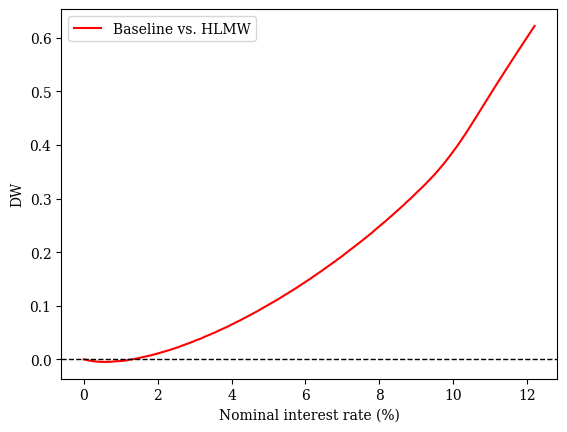

In [30]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(i_grid*100, DW, label='Baseline vs. HLMW',color='r')
plt.axhline(y=0,color="black", linestyle='--',linewidth=1.0)
plt.ylabel("DW")
plt.xlabel("Nominal interest rate (%)")
plt.legend()
plt.show()
plt.savefig("DW.png")

#tikzplotlib.save("DW.tex")
#tikzplotlib.save("DW.pgf")

In [31]:
plt.rcParams['font.family'] = 'serif'

<Figure size 640x480 with 0 Axes>

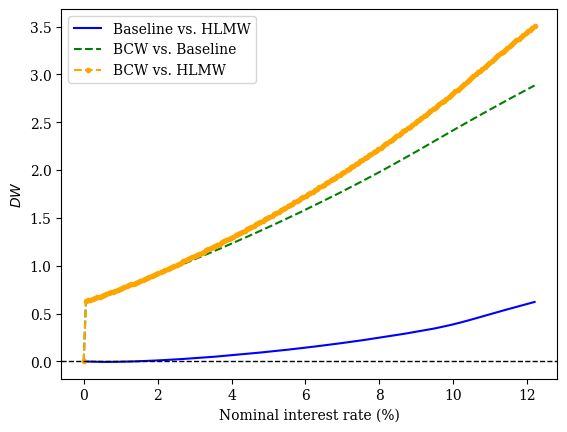

In [32]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(i_grid*100, DW, color='blue', label='Baseline vs. HLMW')
plt.plot(i_grid*100, DW_2, '--', color='green', label='BCW vs. Baseline')
plt.plot(i_grid*100, DW_3, '--.', color='orange', label='BCW vs. HLMW')
#plt.plot(i_grid*100, np.zeros(DW.size))
plt.axhline(y=0,color="black", linestyle='--',linewidth=1.0)
plt.ylabel("$DW$")
plt.xlabel("Nominal interest rate (%)")
plt.legend()
plt.savefig("dw_all.png")

plt.show()

#tikzplotlib.save("dw_all.tex")
#tikzplotlib.save("dw_all.pgf")

### CEV

In [33]:
def gap_percent_func(delta_W_bank, W_no_bank):
    """Use this function to calculate CEV"""
    n_point = 60
    delta = np.append(np.linspace(2, 1, round(n_point/2), endpoint=False), (np.linspace(1, 0.1, round(n_point/2))))
    gap_welfare = delta_W_bank - W_no_bank
    interp_fn = interpolate.interp1d(delta, gap_welfare, 'cubic')
    interp_fn2 = lambda x: interp_fn(x) - 0.0
    gap_delta = brentq(interp_fn2, delta.min(), delta.max())
    cev = (1.0 - gap_delta) * 100
    return cev

In [34]:
def calculate_cev_percent(τ, z_guess, i_guess, case='Case1'):
    n_point = 60
    delta = np.append(np.linspace(2, 1, round(n_point/2), endpoint=False), (np.linspace(1, 0.1, round(n_point/2))))

    # klln
    z, i = model.solve_z_i(z_guess, i_guess, τ)

    # hlmw
    z_hlmw = model_hlmw.z_solver(τ)
    
    # Welfare increases by delta
    if case == 'Case1':
        delta_klln = [model.welfare_func_delta(z, i, τ, k) for k in delta]
            
    elif case == 'Case2':
        delta_bcw = [model.welfare_bcw_func_delta(τ, k) for k in delta]
            
    elif case == 'Case3':
        delta_bcw = [model.welfare_bcw_func_delta(τ, k) for k in delta]

    ### HLMW
    welfare_hlmw = model_hlmw.welfare_func(z_hlmw, τ)
    
    ### Baseline
    welfare_klln = model.welfare_func(z, i, τ)
    
    ### BCW
    welfare_bcw = model.welfare_bcw_func(τ)
    
    if case == 'Case1':
        cev_percent = gap_percent_func(delta_klln, welfare_hlmw)
        
    elif case == 'Case2':
        cev_percent = gap_percent_func(delta_bcw, welfare_klln)
        
    elif case == 'Case3':
        cev_percent = gap_percent_func(delta_bcw, welfare_hlmw)
  

    return cev_percent


In [35]:
Case1_cev = [calculate_cev_percent(j, z_guess, i_guess, case='Case1') for j in τ_grid ]

In [36]:
Case2_cev = [calculate_cev_percent(j, z_guess, i_guess, case='Case2') for j in τ_grid ]

In [37]:
Case3_cev = [calculate_cev_percent(j, z_guess, i_guess, case='Case3') for j in τ_grid ]

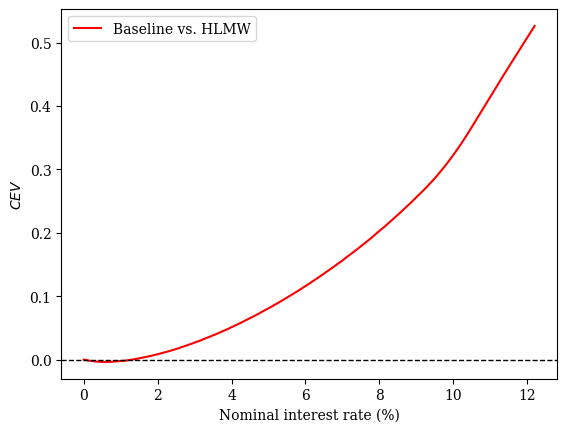

In [38]:

plt.figure(facecolor='white')
plt.plot(i_grid*100, Case1_cev, label='Baseline vs. HLMW',color='r')
plt.axhline(y=0,color="black", linestyle='--',linewidth=1.0)
plt.ylabel("$CEV$")
plt.xlabel("Nominal interest rate (%)")
plt.legend()
plt.savefig("cev.png")
plt.show()


#tikzplotlib.save("cev.tex")
#tikzplotlib.save("cev.pgf")

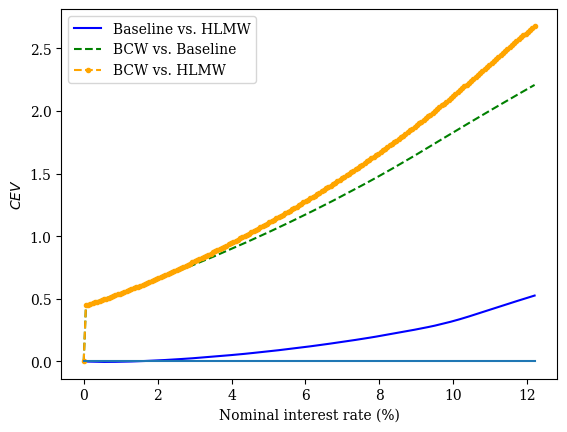

In [39]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(i_grid*100, Case1_cev, color='blue', label='Baseline vs. HLMW')
plt.plot(i_grid*100, Case2_cev, '--', color='green', label='BCW vs. Baseline')
plt.plot(i_grid*100, Case3_cev, '--.', color='orange', label='BCW vs. HLMW')
plt.plot(i_grid*100, np.zeros(τ_grid.size))
plt.ylabel("$CEV$")
plt.xlabel("Nominal interest rate (%)")
plt.legend()
plt.savefig("cev_all.png")
plt.show()


#tikzplotlib.save("cev_all.tex")
#tikzplotlib.save("cev_all.pgf")

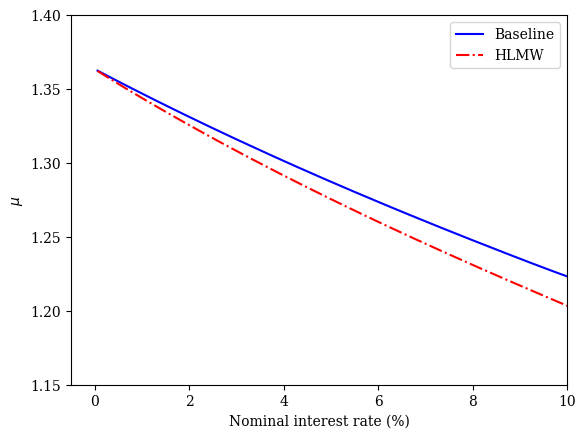

In [40]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(i_grid[1:]*100, markup[1:], color='blue', label='Baseline') #exclude FR
plt.plot(i_grid[1:]*100, markup_hlmw[1:], '-.', color='red', label='HLMW') #exclude FR
plt.ylabel(r'$μ$')
plt.xlabel("Nominal interest rate (%)")
plt.legend()
plt.yticks(np.arange(1.15,1.41, 0.05))
plt.xlim(-0.5,10)
plt.savefig("markup.png", bbox_inches='tight', pad_inches=0.05)
plt.show()


tikzplotlib.save("markup.tex")
tikzplotlib.save("markup.pgf")

<Figure size 640x480 with 0 Axes>

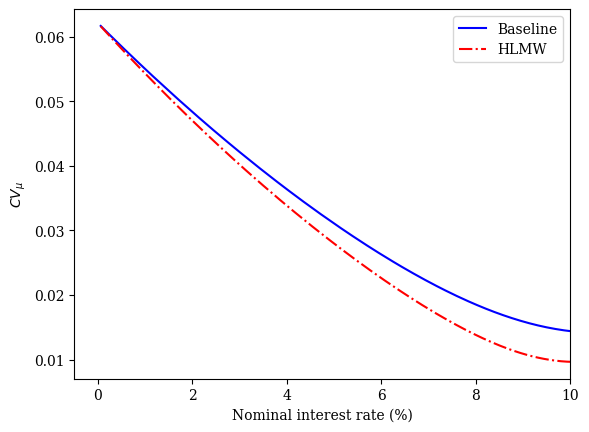

In [41]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(i_grid[1:]*100, markup_cv[1:], color='blue', label='Baseline') #exclude FR
plt.plot(i_grid[1:]*100, markup_cv_hlmw[1:], '-.', color='red', label='HLMW') #exclude FR
plt.ylabel(r'$CV_{μ}$')
plt.xlabel("Nominal interest rate (%)")
plt.legend()
plt.xlim(-0.5,10)
plt.savefig("markup_cv.png", bbox_inches='tight', pad_inches=0.05)
plt.show()


#tikzplotlib.save("markup_cv.tex")
#tikzplotlib.save("markup_cv.pgf")

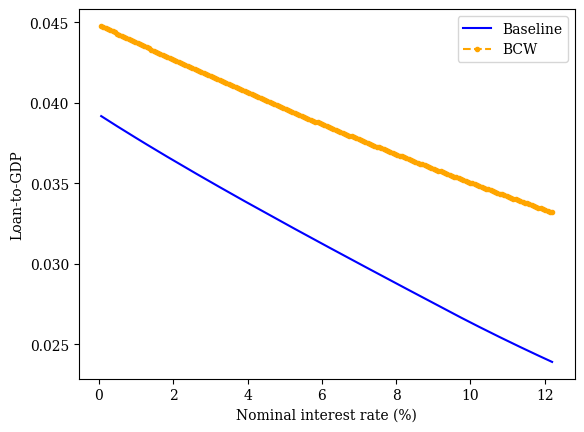

In [42]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(i_grid[1:]*100, loan_gdp[1:], color='blue', label='Baseline') #exclude FR
plt.plot(i_grid[1:]*100, loan_gdp_bcw[1:], '--.', color='orange', label='BCW') #exclude FR
plt.ylabel('Loan-to-GDP')
plt.xlabel("Nominal interest rate (%)")
plt.legend()
plt.savefig("loan_gdp.png", bbox_inches='tight', pad_inches=0)
plt.show()


#tikzplotlib.save("loan_gdp.tex")
#tikzplotlib.save("loan_gdp.pgf")

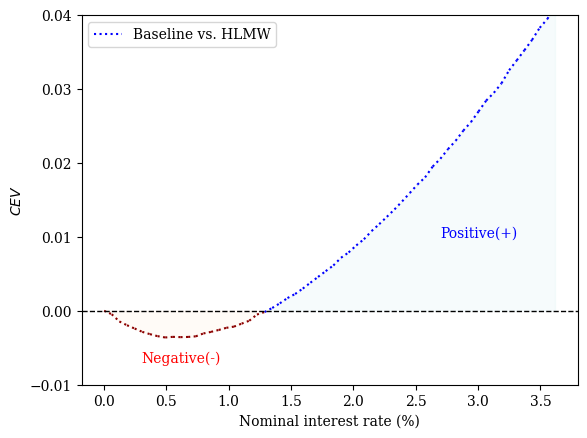

In [43]:
##### ZOOM-IN

##### plt.style.use(style='default')
plt.figure(facecolor='white')
# Initialize a flag to indicate when the label has been added
label_added_red = False
label_added_blue = False

for i in range(1, len(i_grid[0:60])):
    if Case1_cev[i-1] <= 0 and Case1_cev[i] > 0 or Case1_cev[i-1] > 0 and Case1_cev[i] > 0:
        # This segment is positive, plot in blue
        if not label_added_blue:
            plt.plot(i_grid[i-1:i+1]*100, Case1_cev[i-1:i+1], color='blue', linestyle=':', label='Baseline vs. HLMW')
            label_added_blue = True
        else:
            plt.plot(i_grid[i-1:i+1]*100, Case1_cev[i-1:i+1], color='blue', linestyle=':')
    else:
        # This segment is not positive, plot in dark red
        if not label_added_red:
            plt.plot(i_grid[i-1:i+1]*100, Case1_cev[i-1:i+1], color='darkred', linestyle=':')
            label_added_red = True
        else:
            plt.plot(i_grid[i-1:i+1]*100, Case1_cev[i-1:i+1], color='darkred', linestyle=':')


#plt.plot(i_grid[0:10]*100, np.zeros(τ_grid[0:30].size))
plt.ylabel("$CEV$")
plt.xlabel("Nominal interest rate (%)")
plt.legend()
plt.axhline(y=0,color="black", linestyle='--',linewidth=1.0)
plt.fill_between(i_grid[0:60]*100, Case1_cev[0:60], where=(np.array(Case1_cev)[0:60] <= 0), color='peachpuff', alpha=0.1, interpolate=True)
plt.fill_between(i_grid[0:60]*100, Case1_cev[0:60], where=(np.array(Case1_cev)[0:60] >= 0), color='#B0E0E6', alpha=0.1, interpolate=True)
plt.text(0.3, -0.007, 'Negative(-)',size=10,color='red')
plt.text(2.7, 0.01, 'Positive(+)',size=10,color='blue')
plt.ylim(-0.01,0.04)
plt.savefig("cev_zoom_in.png", bbox_inches='tight', pad_inches=0.05)
plt.show()


#tikzplotlib.save("cev_zoom_in.tex")
#tikzplotlib.save("cev_zoom_in.pgf")